In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

In [3]:
df=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
count_diabetes=df['Outcome'].value_counts()
count_diabetes

Outcome
0    500
1    268
Name: count, dtype: int64

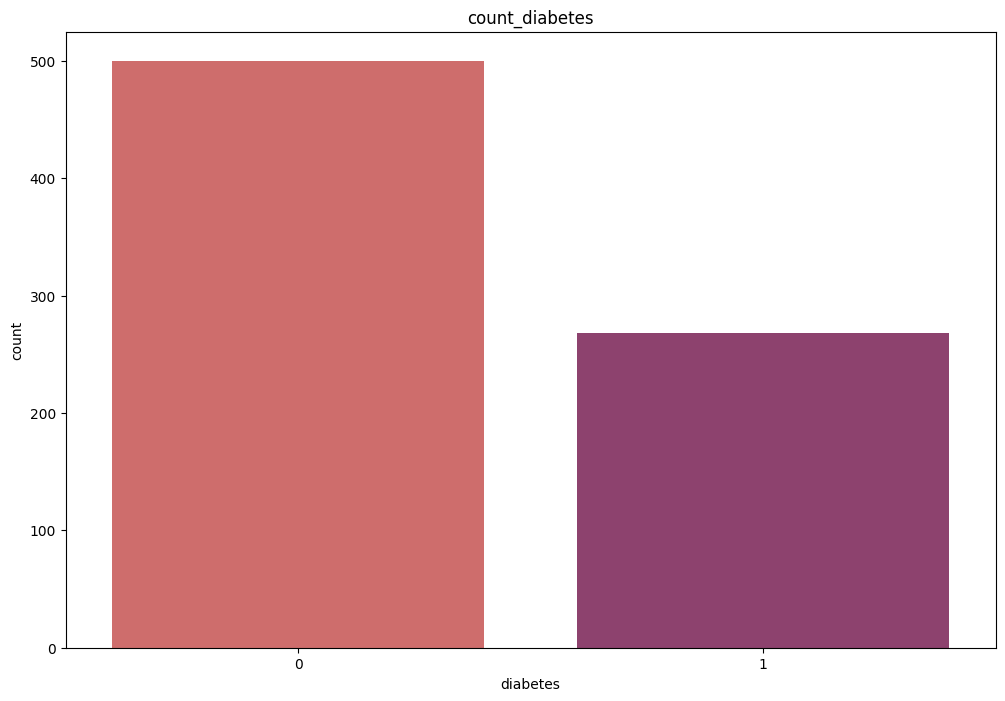

In [8]:
plt.figure(figsize=(12,8))
sns.barplot(x=count_diabetes.index,y=count_diabetes.values,palette='flare')
plt.title('count_diabetes')
plt.xlabel('diabetes')
plt.ylabel('count')
plt.show()

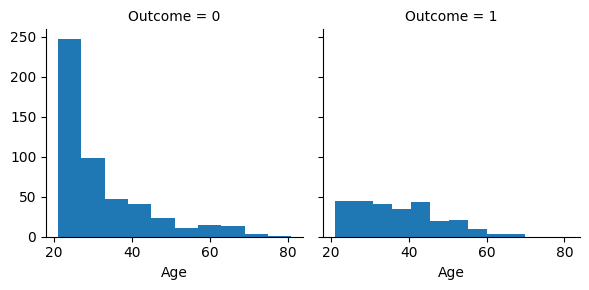

In [9]:
age=sns.FacetGrid(df,col='Outcome')
age.map(plt.hist,'Age')

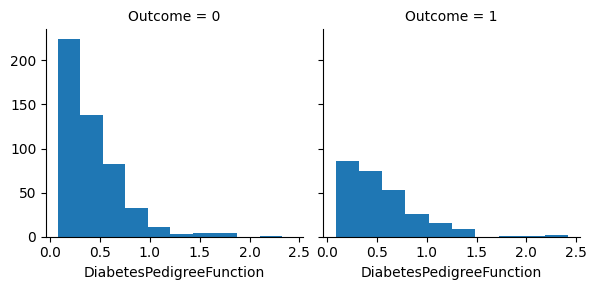

In [10]:
DiabetesPedigreeFunction=sns.FacetGrid(df,col='Outcome')
DiabetesPedigreeFunction.map(plt.hist,'DiabetesPedigreeFunction')

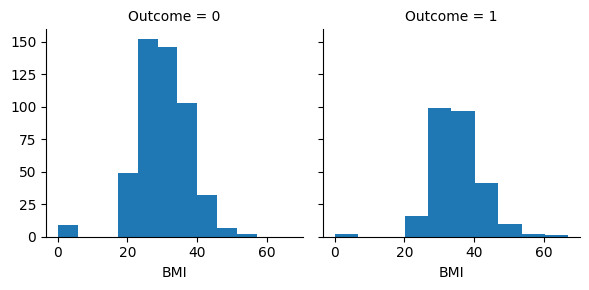

In [11]:
BMI=sns.FacetGrid(df,col='Outcome')
BMI.map(plt.hist,'BMI')

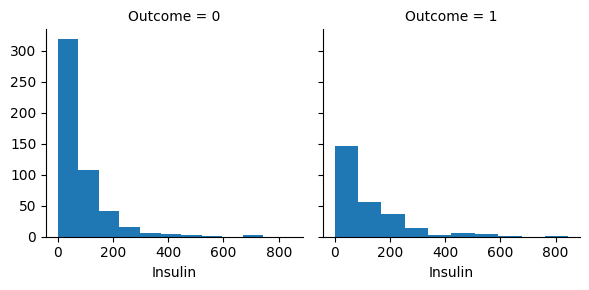

In [12]:
Insulin=sns.FacetGrid(df,col='Outcome')
Insulin.map(plt.hist,'Insulin')

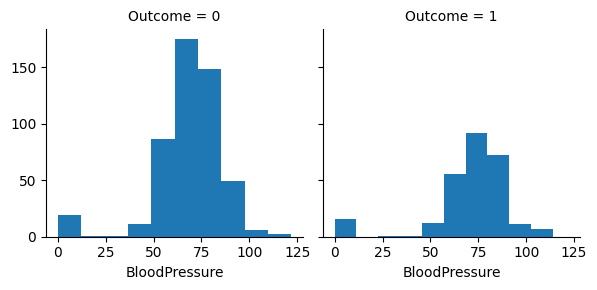

In [13]:
BloodPressure=sns.FacetGrid(df,col='Outcome')
BloodPressure.map(plt.hist,'BloodPressure')

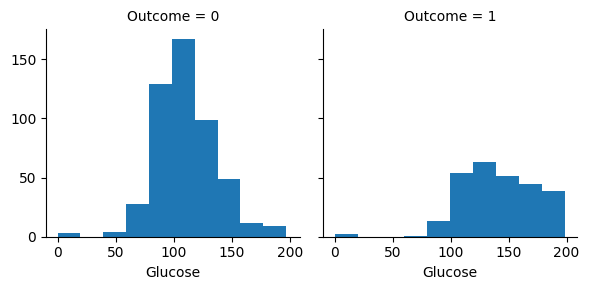

In [14]:
Glucose=sns.FacetGrid(df,col='Outcome')
Glucose.map(plt.hist,'Glucose')

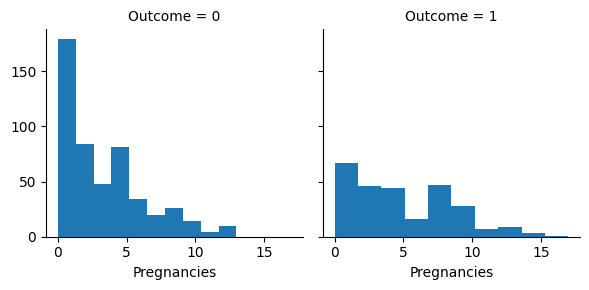

In [15]:
Pregnancies=sns.FacetGrid(df,col='Outcome')
Pregnancies.map(plt.hist,'Pregnancies')

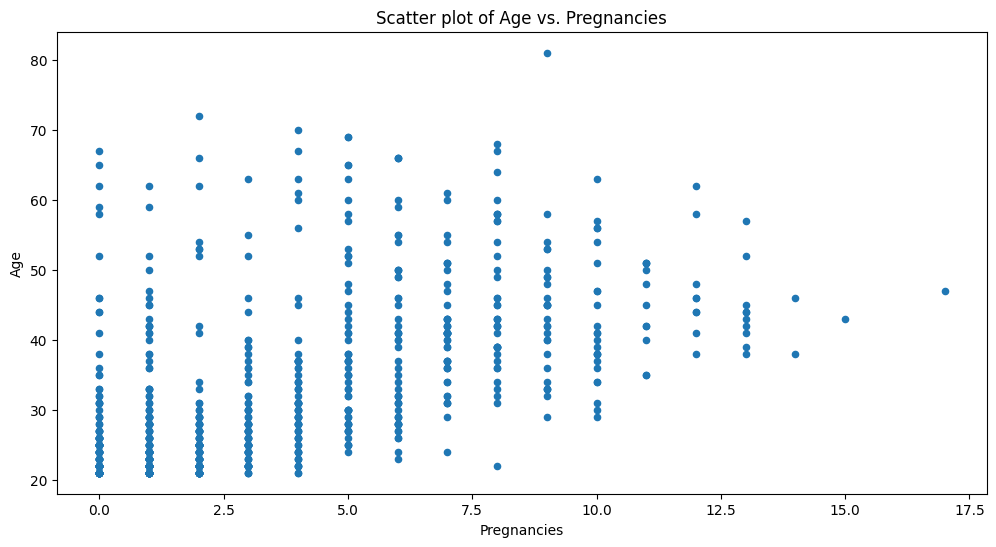

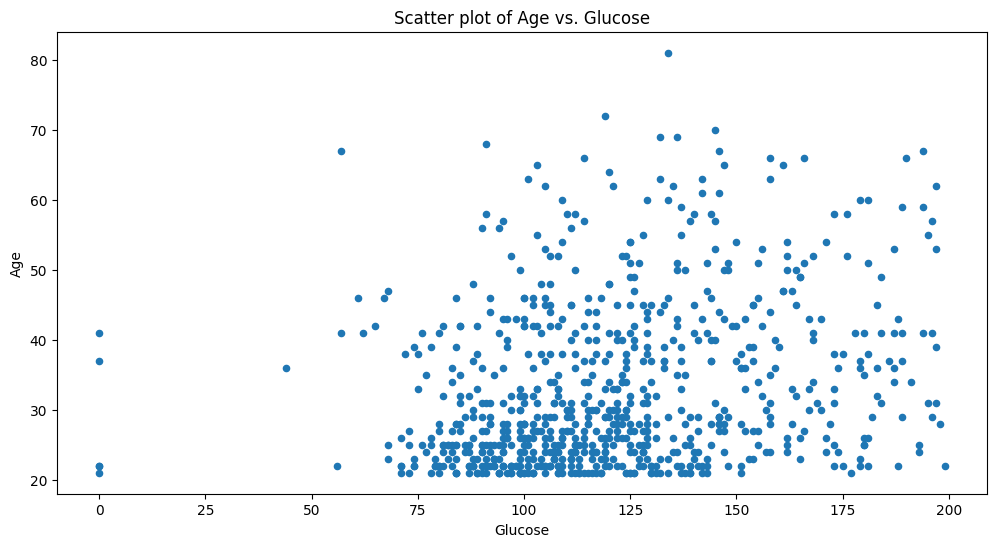

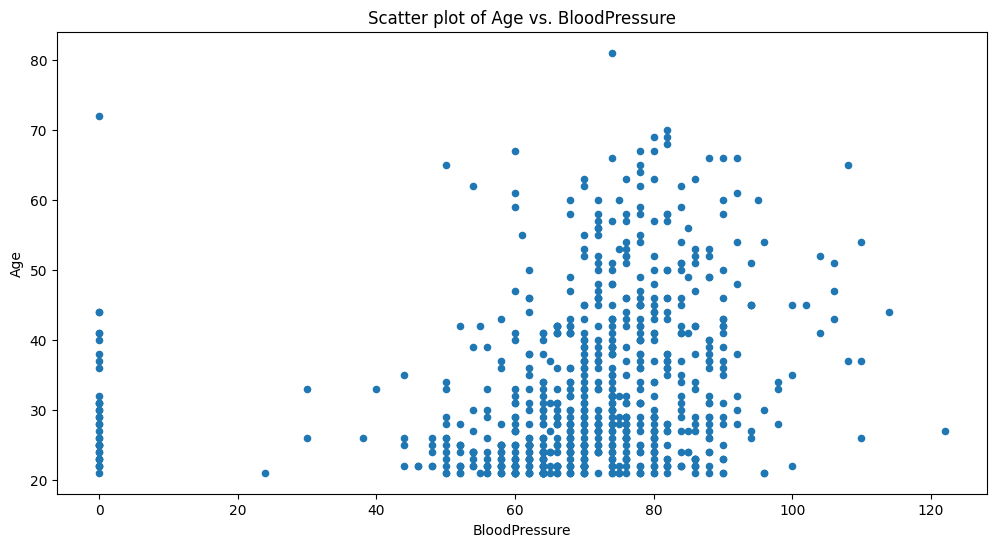

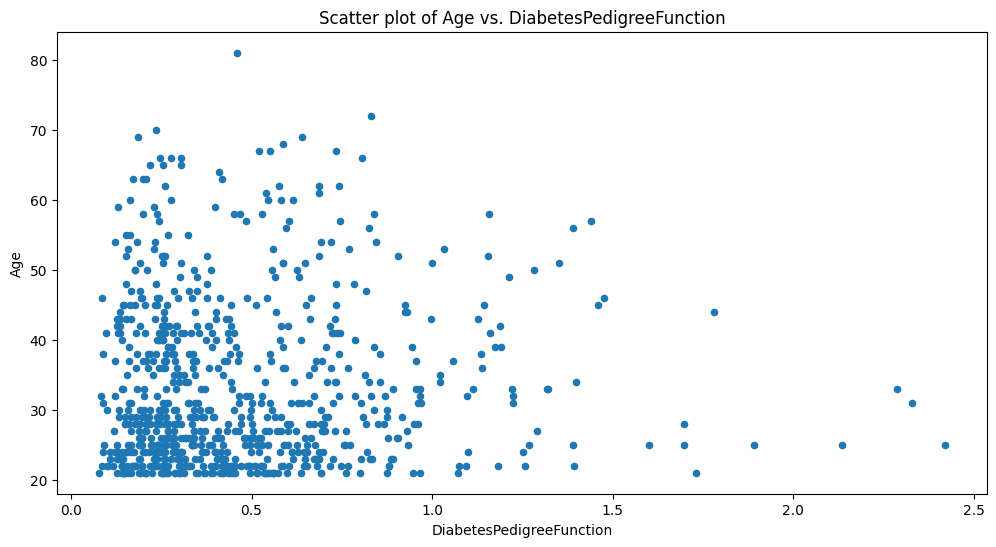

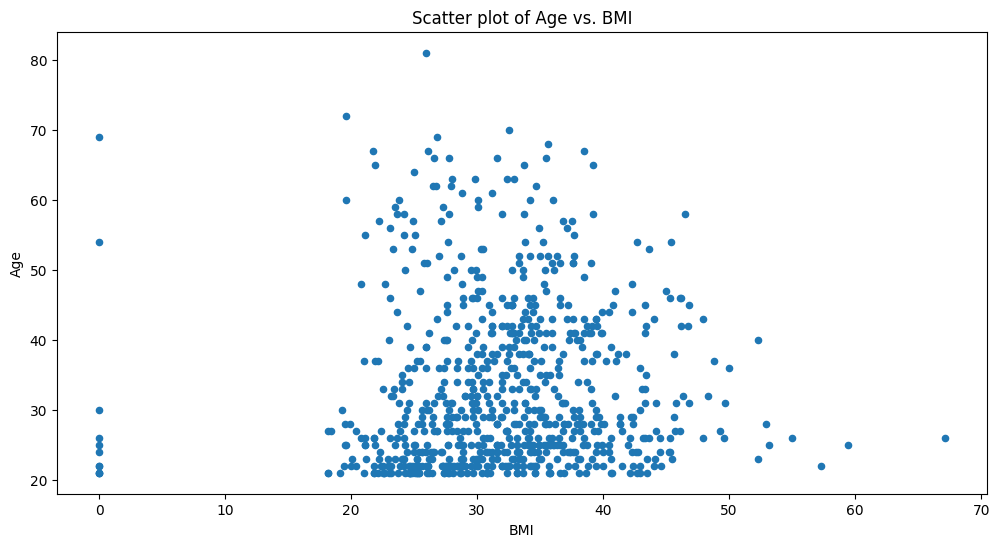

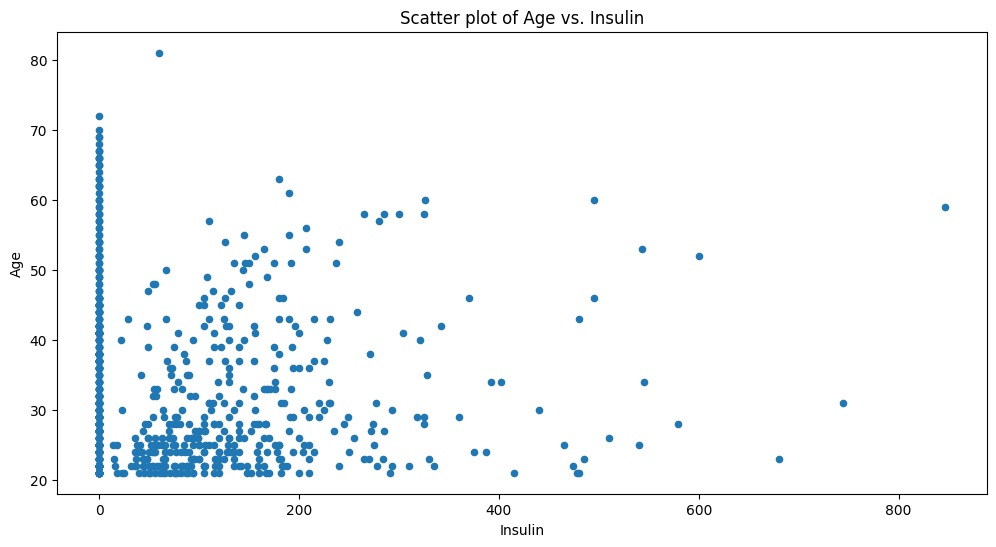

In [16]:
def plot_scatter(df, cols, col_y = 'Age'):
    for col in cols:
        fig = plt.figure(figsize=(12,6)) 
        ax = fig.gca()    
        df.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) 
        ax.set_xlabel(col)
        ax.set_ylabel(col_y)
        plt.show()
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction','BMI','Insulin']
plot_scatter(df, num_cols) 

Text(0.5, 1.0, 'Box Plot')

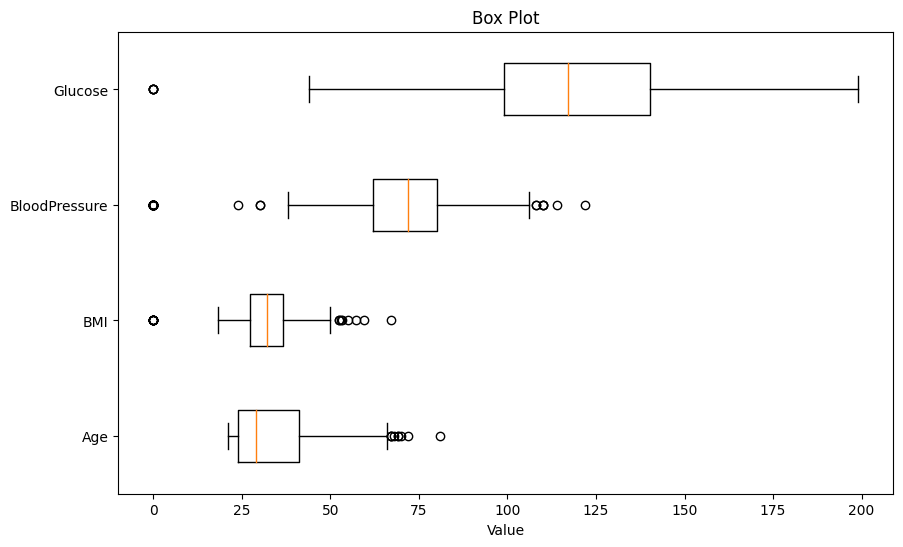

In [17]:
plt.figure(figsize=(10,6))
plt.boxplot([df['Age'], df['BMI'], df['BloodPressure'], df['Glucose']], vert=False)
plt.yticks([1, 2, 3, 4], ['Age', 'BMI', 'BloodPressure', 'Glucose'])
plt.xlabel('Value')
plt.title("Box Plot")

In [18]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


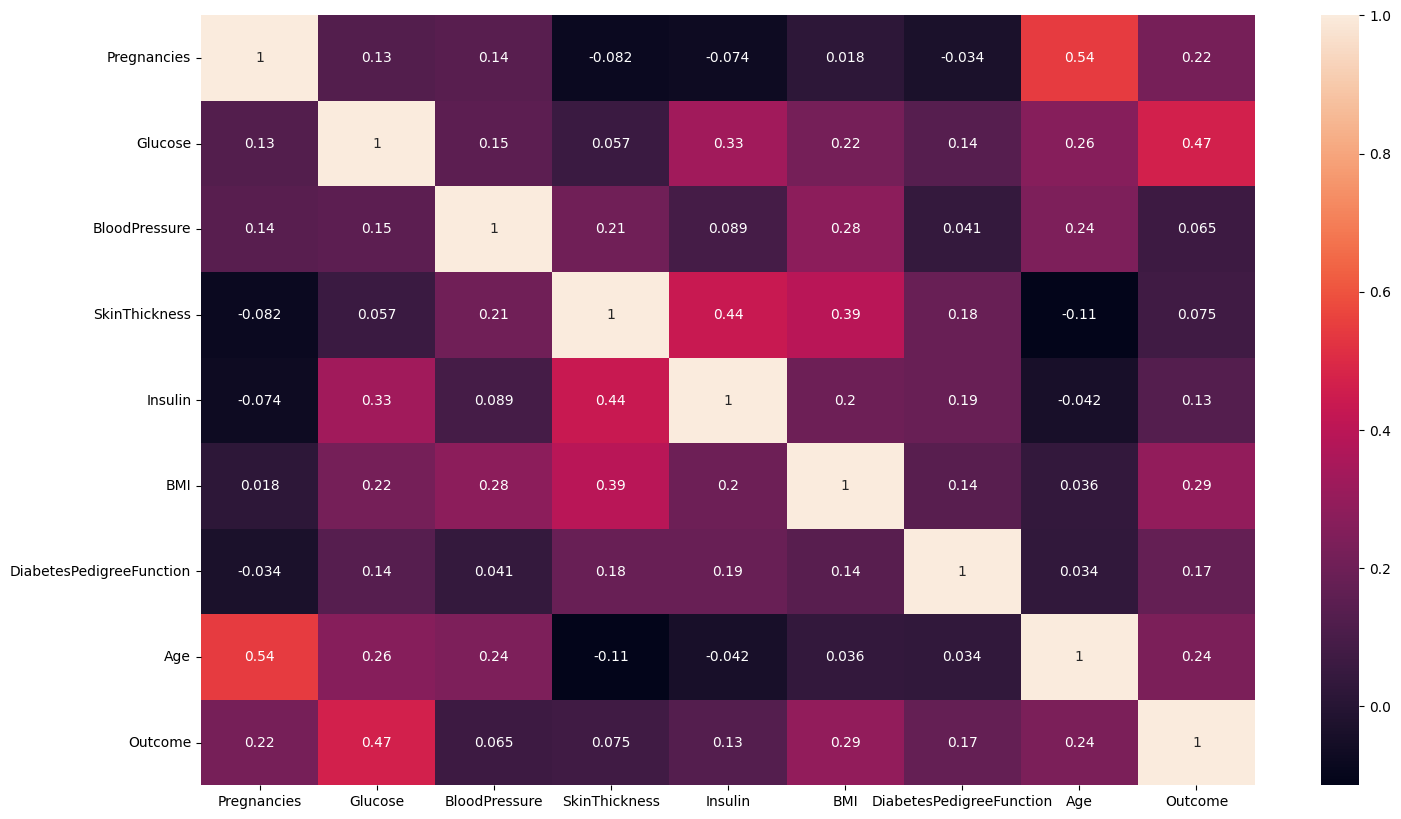

In [23]:
plt.figure(figsize=(17, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()